<a href="https://colab.research.google.com/github/pdpcosta/COVID-19_Brazil/blob/master/Python/COVID_19_Brazil_States_HealthSystemCollapseAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brazilian States Health System Collapse Analysis

## Objective
Our intention is to envision how prepared are Brazilian states to deal with COVID-19, analysing information about confirmed cases and the number of ITU units in Brazil.

We analyze data available at: https://github.com/pdpcosta/COVID-19_Brazil

In [0]:
#============================================================================
#             COVID-19_Brazil_States_HealthSystemCollapseAnalysis
#============================================================================
# Script name: COVID-19_Brazil_States_HealthSystemCollapseAnalysis
# Created on: 04/04/2020
# Authors: Júlia Perassoli De Lázari e Paula Dornhofer Paro Costa, FEEC, Unicamp
#
# Notice:
# Copyright (C) 2020  University of Campinas, FEEC
#
# This program is free software; you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation; either version 2 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
# https://www.gnu.org/licenses/gpl-3.0.en.html
#
#=============================================================================


#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#urls
url_cases = 'https://raw.githubusercontent.com/pdpcosta/COVID-19_Brazil/master/DATA/COVID-19_Brazil_CONF_DEATH.csv'
url_itu = 'https://raw.githubusercontent.com/pdpcosta/COVID-19_Brazil/master/DATA/IntensiveTherapyUnits/Brazil_ITU_byStates.csv'
#read data
df_cases = pd.read_csv(url_cases)
df_itu = pd.read_csv(url_itu)
#print (df_cases)
#print (df_itu)
#convert object in int
#print(df_uti.dtypes)
df_itu.iloc[:,2:38] = df_itu.iloc[:,2:38].astype(str).astype(int)
#print(df_itu.dtypes)
#date -> datetime
df_cases['Date'] = pd.to_datetime(df_cases['Date'])
#replace NA values for the last value known
df_cases['Death'].fillna(method = "ffill", inplace = True)
df_cases['Confirmed'].fillna(method = "ffill", inplace = True)

##Total number of ITUs per Brazilian State

We obtained data from DATASUS, the Brazilian government department that consolidates information from our health system.

In our analysis, we considered only ITU beds that could be potentially used by COVID-19 patients: adult, coronary and isolation. In the ITU dataframe, these are represented by itu1, itu2, itu3, coitu2, coitu3, isol. The terms refer to Brazilian definitions given by the Ministry of Health [[1]](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=5&ved=2ahUKEwizpZvWws7oAhUoJrkGHQXKDn4QFjAEegQIAhAB&url=https%3A%2F%2Fwww.saude.gov.br%2Fimages%2Fpdf%2F2017%2Fabril%2F07%2F106713-16-82-Minuta-Portaria-PROTOCOLO.pdf&usg=AOvVaw2lRDs3RsehnKawvE6j9oqG).

We calculated the total number of ITUs units per State for the Brazilian public health system - SUS(total_sus), for the private sytem (total_pvt) and the sum of them (total). These results were added in the UTI dataframe as new columns. 

Then, we calculated the total ITU units for Brazil, for the public system (total_sus_br), the private system (total_pvt_br) and the total (total_br).

In [2]:
#total ITU units
total_sus = [] #brazilian public health system
total_pvt = [] #
total = []

#considering only itu1,itu2,coitu2,coitu3 and isol
for i in range (len(df_itu.State)):
  sus = df_itu.itu1_sus[i] + df_itu.itu2_sus[i] + df_itu.itu3_sus[i] + df_itu.coitu2_sus[i]+ df_itu.coitu3_sus[i] + df_itu.isol_sus[i]
  pvt = df_itu.itu1_pvt[i] + df_itu.itu2_pvt[i] + + df_itu.itu3_pvt[i] + df_itu.coitu2_pvt[i]+ df_itu.coitu3_pvt[i] + df_itu.isol_pvt[i]
  total_sus.append(sus)
  total_pvt.append(pvt)
  total.append(sus+pvt)

#creat new columns in the dataframe
df_itu['Total_sus'] = total_sus
df_itu['Total_pvt'] = total_pvt
df_itu['Total'] = total
print(df_itu[['State','Total_sus','Total_pvt','Total']])

#total in Brasil
total_sus_br = 0
total_pvt_br = 0
total_br = 0

for i in range(len(total)):
  total_sus_br += total_sus[i]
  total_pvt_br += total_pvt[i]
  total_br += total[i]

print("Total SUS:",total_sus_br)
print("Total private system:",total_pvt_br)
print("Total:",total_br)


   State  Total_sus  Total_pvt  Total
0     AC         64         15     79
1     AL        213        130    343
2     AM        336        118    454
3     AP         33         35     68
4     BA       1045        776   1821
5     CE        556        410    966
6     DF        195        875   1070
7     ES        384        455    839
8     GO        655        605   1260
9     MA        439        286    725
10    MG       2309       1218   3527
11    MS        234        207    441
12    MT        303        427    730
13    PA        560        311    871
14    PB        412        185    597
15    PE        895        735   1630
16    PI        203         91    294
17    PR       1471        876   2347
18    RJ       1379       3084   4463
19    RN        250        232    482
20    RO        182         82    264
21    RR         43          8     51
22    RS       1267        673   1940
23    SC        700        358   1058
24    SE        169        105    274
25    SP    

##Total Public versus Private ITU beds![alt text](https://)

Based on the results of the previous section, it's possible to see the relation between the number of ITU units from the public and private health system.

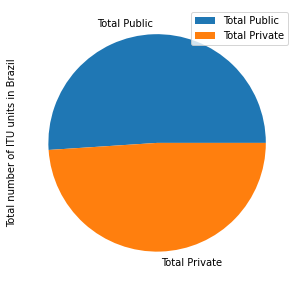

In [3]:
#data frame with the data of total itu units
tot_br = pd.DataFrame({'Total number of ITU units in Brazil':[total_sus_br,total_pvt_br]}, index = ["Total Public","Total Private"])
#plot pie graph
plot = tot_br.plot.pie(y = 'Total number of ITU units in Brazil',figsize = (5,5))

## Top five and bottom five states in ITU units

Here, we try to identify the most and the least prepared states to deal with COVID -19 considering the number of available ITUs units.

We plot the number of ITUs in these states (total, from public health system and from private health system).

Top 5 states in ITU units
    State  Total_sus  Total_pvt  Total
25    SP       4071       5349   9420
18    RJ       1379       3084   4463
10    MG       2309       1218   3527
17    PR       1471        876   2347
22    RS       1267        673   1940


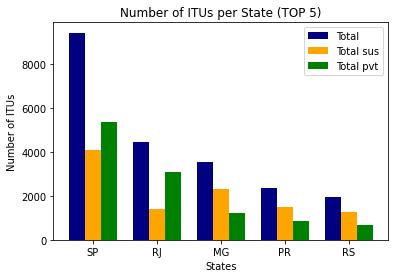

Bottom 5 states in ITU units
    State  Total_sus  Total_pvt  Total
21    RR         43          8     51
3     AP         33         35     68
0     AC         64         15     79
26    TO         90         62    152
20    RO        182         82    264


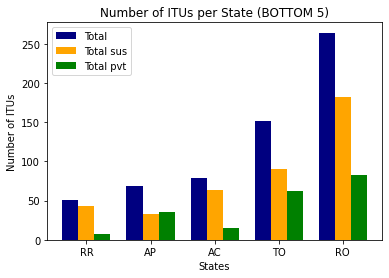

In [4]:
#TOP 5

#define topfive_itu as the ones with more ITU units
topfive_itu = df_itu.sort_values('Total',ascending =False).head(5)
#print data from these 5 states
print ("Top 5 states in ITU units\n",
       topfive_itu[['State','Total_sus','Total_pvt','Total']])

#Graph

barWidth = 0.25 #set width of bar
r1 = np.arange(len(topfive_itu.Total)) #set position of bar on X axis
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
#plots
plt.bar(r1, topfive_itu.Total, color = 'navy', width = barWidth, label = 'Total')
plt.bar(r2, topfive_itu.Total_sus, color = 'orange', width = barWidth, label = 'Total sus')
plt.bar(r3, topfive_itu.Total_pvt, color = 'green', width = barWidth, label = 'Total pvt')
#labels, legend and title
plt.title("Number of ITUs per State (TOP 5)")
plt.ylabel("Number of ITUs")
plt.xlabel('States')
plt.xticks([r+barWidth for r in range(len(topfive_itu.Total))],topfive_itu.State)
plt.legend()
plt.show()

#BOTTOM 5

#define bottomfive_itu as the ones with more ITU units
bottomfive_itu = df_itu.sort_values('Total',ascending =True).head(5)
#print data from these 5 states
print ("Bottom 5 states in ITU units\n",
       bottomfive_itu[['State','Total_sus','Total_pvt','Total']])

#Graph

#plots
plt.bar(r1, bottomfive_itu.Total, color = 'navy', width = barWidth, label = 'Total')
plt.bar(r2, bottomfive_itu.Total_sus, color = 'orange', width = barWidth, label = 'Total sus')
plt.bar(r3, bottomfive_itu.Total_pvt, color = 'green', width = barWidth, label = 'Total pvt')
#labels, legend and title
plt.title("Number of ITUs per State (BOTTOM 5)")
plt.ylabel("Number of ITUs")
plt.xlabel('States')
plt.xticks([r+barWidth for r in range(len(bottomfive_itu.Total))],bottomfive_itu.State)
plt.legend()
plt.show()

## Estimation of the percentage of Brazilian COVID-19 cases that will require ITU care


Based on the data from Ferguson et al., 2020 and the age distribution in Brazil (IBGE data) it was possible to determine the likely percentage of infected brazilians that will need ITU care [[1]](https://www.telegraph.co.uk/global-health/science-and-disease/coronavirus-hospitalisation-rates-revealed-80-per-cent-infected/) [[2]](https://www.imperial.ac.uk/media/imperial-college/medicine/sph/ide/gida-fellowships/Imperial-College-COVID19-NPI-modelling-16-03-2020.pdf).

We assumed that the age distribution of the infected is the same as the population. Then, we calculated the percentage of infected Brazilian requiring critical care, which turned to be approximately 1.44%.


In [5]:
df_percentage=pd.read_csv('https://raw.githubusercontent.com/pdpcosta/COVID-19_Brazil/master/DATA/IntensiveTherapyUnits/ferguson2020impact_table1.csv')
df_brpop=pd.read_csv('https://github.com/pdpcosta/COVID-19_Brazil/raw/master/DATA/IntensiveTherapyUnits/brpop.csv')

# Compute percentage_itu (percentage of confirmed cases that need itu treatment per age)
# In this step we assumed that the age distribution of the confirmed cases is the same as the Brazilian population.
percentage_itu=df_percentage.Hospitalisation*df_percentage.CriticalCare*df_brpop.brpop

# Estimated percentage of confirmed cases requiring critical care, i.e. ITU beds
br_itu_percentage=percentage_itu.cumsum().iloc[-1]
print("Estimated ITU percentage of confirmed cases in Brazil:",br_itu_percentage*100)


Estimated ITU percentage of confirmed cases in Brazil: 1.4389179


## Brazilian States Health System Collapse Prediction

Based on the result that approximately 1.4% of Brazilian COVID-19 cases will require critical care, it's possible to estimate if/when the Brazilian states health system are going to collapse.

We used the exponential model to project confirmed cases for the next 5 days (navy blue lines). Orange lines represent the projection of ITU hospitalisations for the next 20 days.

To estimate the collapse we consider that most ITU beds are already occupied [[3]](https://oglobo.globo.com/sociedade/coronavirus-servico/coronavirus-leitos-de-uti-tem-mais-de-70-de-ocupacao-em-17-estados-24337582), so we consider the worst case scenario, in which we have only 22% of the total number of ITU units available. The collapse is illustrated by the orange line crossing the red line.

**The graphs are updated daily.**

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


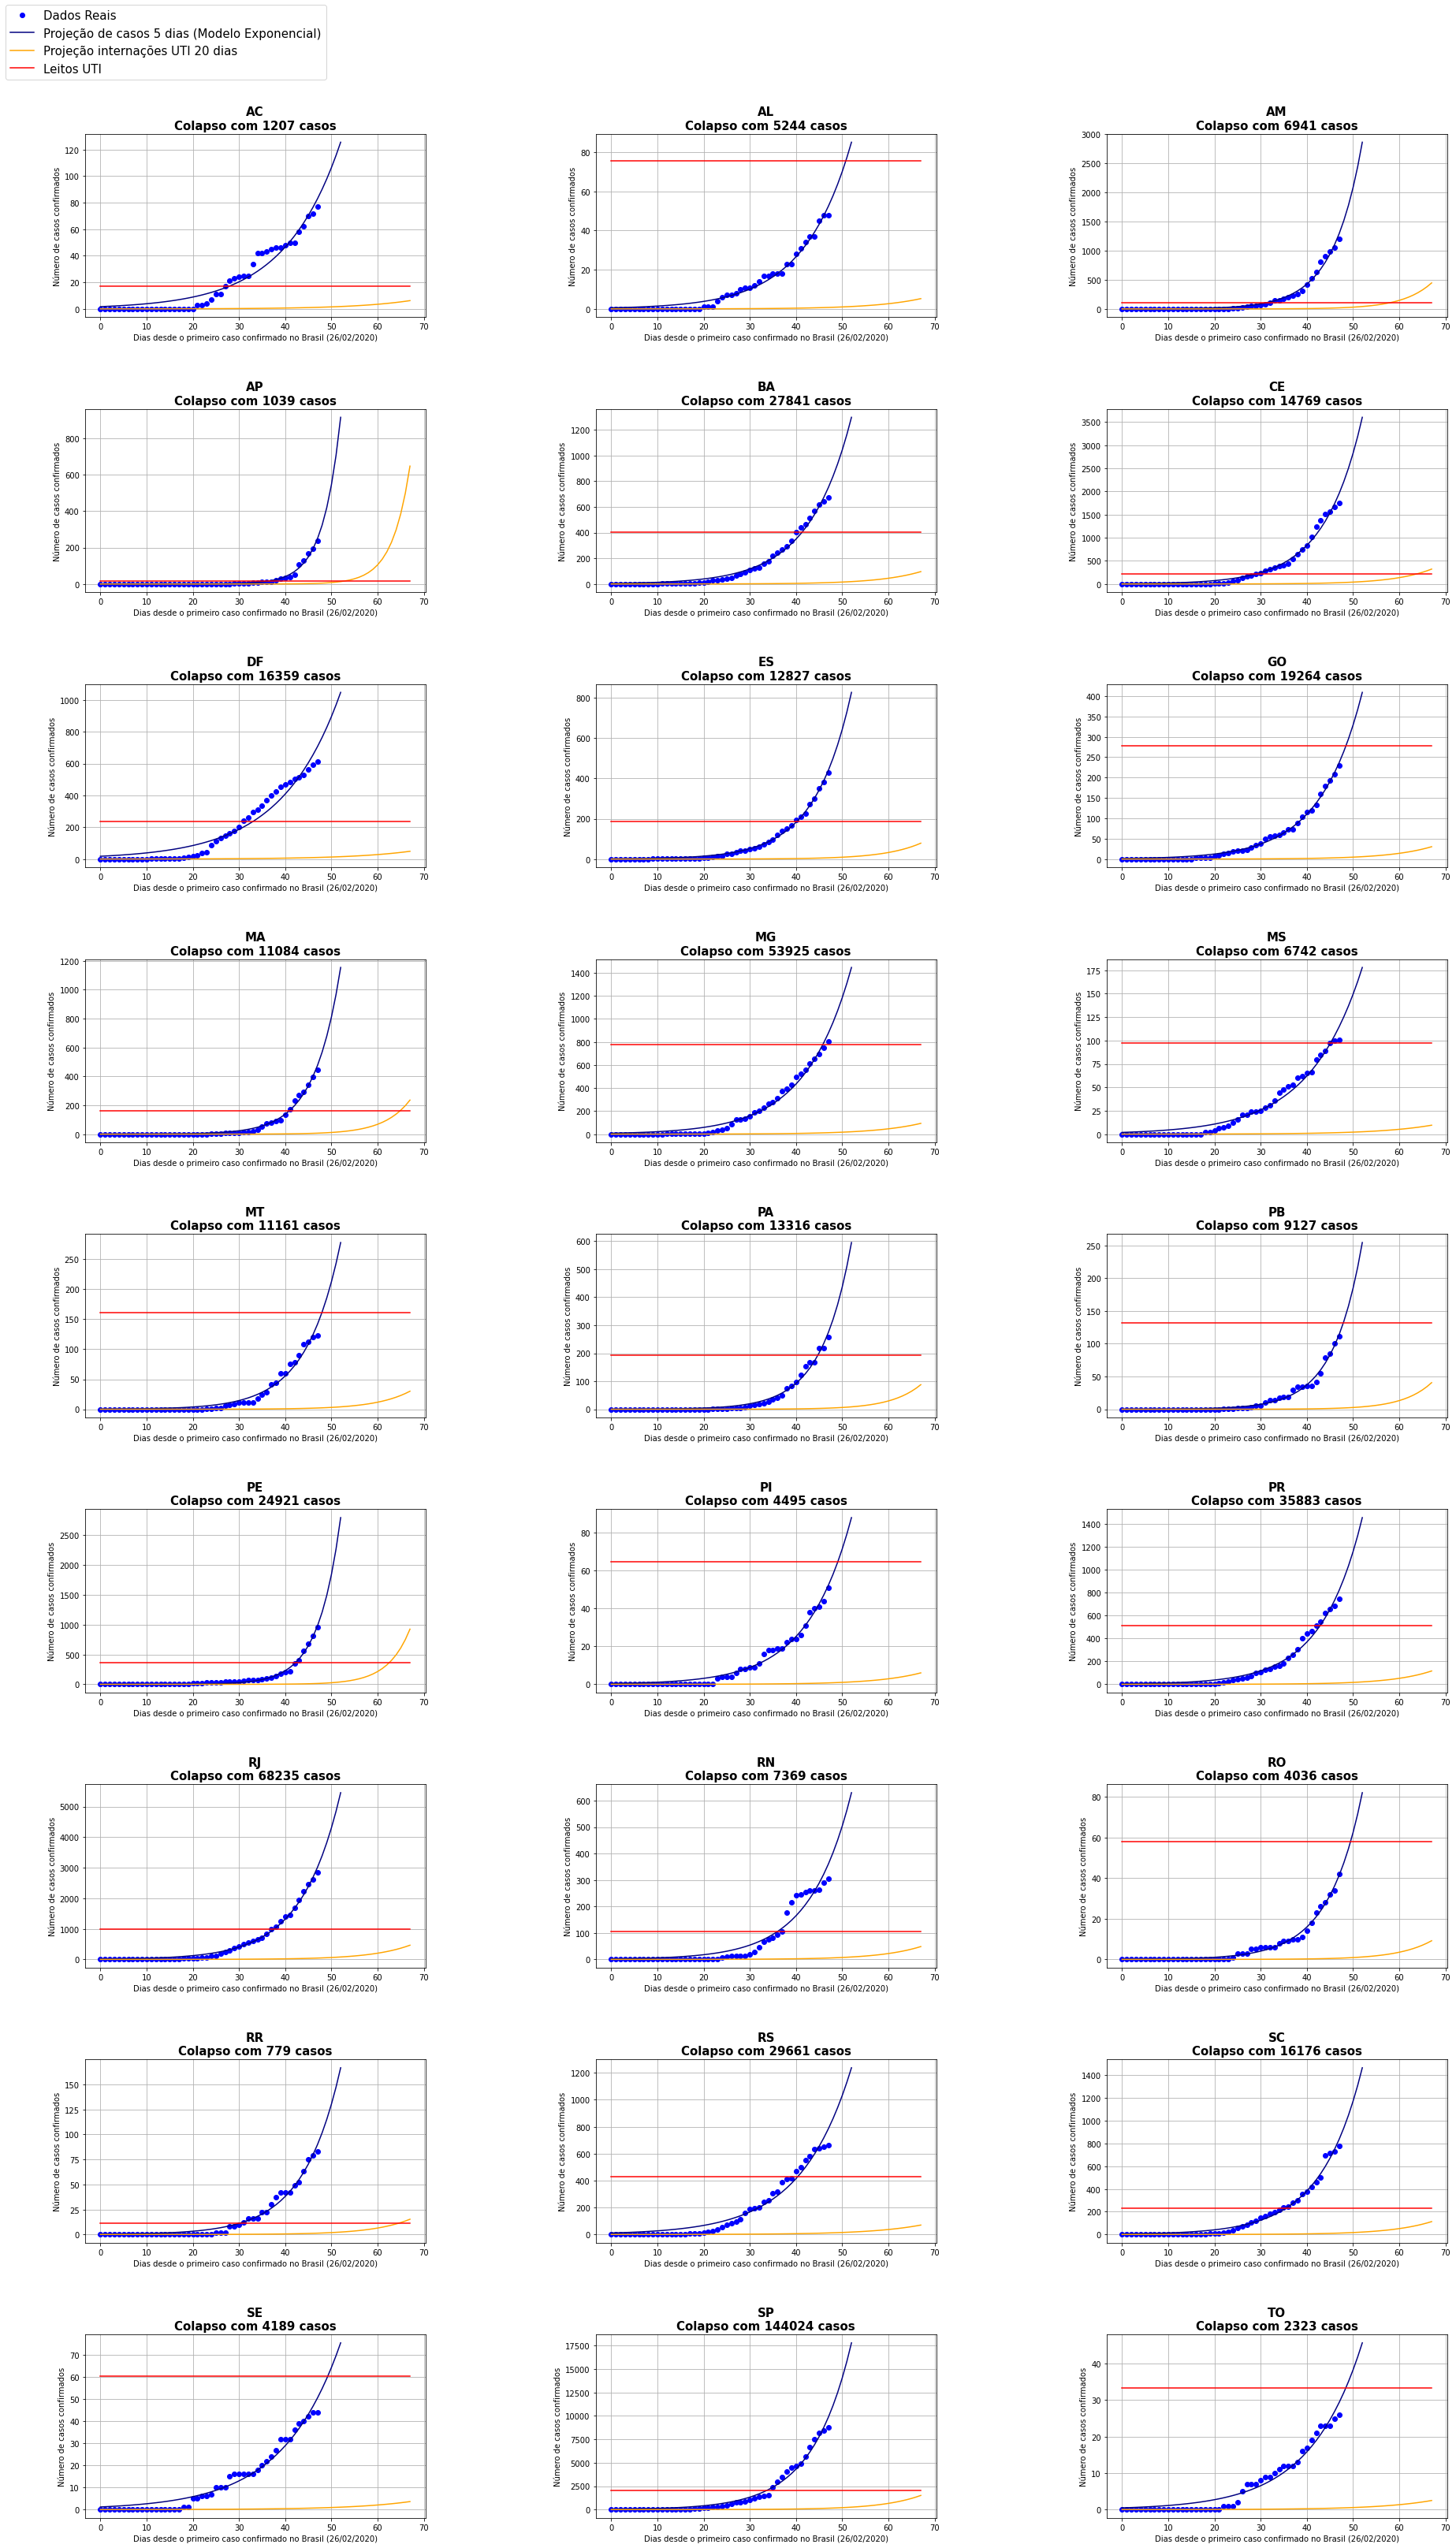

In [6]:
def exponential_model(x, a, b, c):
     return a*np.exp(b*(x-c))

#create 27 suplots (9x3) and adjust size and font
fig,a = plt.subplots(9,3,figsize = (30,30))
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.5, wspace=0.5, hspace=0.5)
font = {'family' : 'fantasy',
        'weight' : 'normal',
        'variant': 'normal',
        'size'   : 20}

#auxiliar variables
j = 0
k = 0
day1=0

#plot graphs
for i in range(27):
  x = df_itu.iloc[i,1] #get state
  

  #state_epidemy=df_cases[df_cases.State==x]
  state=df_cases[df_cases.State==x]
  state_epidemy=state
  #state_epidemy=state[(state['Confirmed']>0)]
  #day1=state_epidemy['Date'].iloc[0]
  #day1=day1-pd.Timedelta(days=20)
  #state_epidemy=state[(state['Date']>=day1)]
  #print(state_epidemy.head(3))

  expfit_state=curve_fit(exponential_model,np.asarray(range(len(state_epidemy))),state_epidemy['Confirmed'],p0=[1,1,1])
  # real data
  a[j][k].plot(range(len(state_epidemy.Date)),state_epidemy['Confirmed'],'ro', label = "Dados Reais", color = "b")
  # predicted curve for the following 5 days for confirmed cases and estimated ITU hospitalisation
  a[j][k].plot(np.asarray(range(len(state_epidemy.Date)+5)), [exponential_model(i,expfit_state[0][0],expfit_state[0][1],expfit_state[0][2]) for i in np.asarray(range(len(state_epidemy.Date)+5))], label="Projeção de casos 5 dias (Modelo Exponencial)", color = 'navy' ) #exp curve
  a[j][k].plot(np.asarray(range(len(state_epidemy.Date)+20)), [0.0144*exponential_model(i,expfit_state[0][0],expfit_state[0][1],expfit_state[0][2]) for i in np.asarray(range(len(state_epidemy.Date)+20))], label="Projeção internações UTI 20 dias", color = 'orange' ) #exp curve itu hospitalizations
  # number of ITU units (22% of total)
  a[j][k].set_xlabel("Dias desde o primeiro caso confirmado no Brasil (26/02/2020)")
  a[j][k].set_ylabel("Número de casos confirmados")
  itu_units=np.zeros((len(state_epidemy.Date)+20))+(0.22*df_itu[df_itu.State==x].Total.iloc[0])
  a[j][k].plot(range(len(state_epidemy.Date)+20), itu_units,label = 'Leitos UTI', color = 'red')

#   state = df_cases[df_cases.State == x]
#   a[j][k].set_title(str(x),fontweight="bold", size=15)
#   expfit_state = curve_fit(exponential_model,np.asarray(range(len(state.Date))), state['Confirmed'], p0 = [1,1,1])
#   #real data
#   a[j][k].plot(range(len(state.Date)),state['Confirmed'],'ro', label = "Dados Reais", color = "b")
#   #predicted curve for confirmed cases
#   a[j][k].plot(np.asarray(range(len(state.Date)+5)), [exponential_model(i,expfit_state[0][0],expfit_state[0][1],expfit_state[0][2]) for i in np.asarray(range(len(state.Date)+5))], label="Exp Model", color = 'r' ) #exp curve
#   a[j][k].plot(np.asarray(range(len(state.Date)+5)), [0.0144*exponential_model(i,expfit_state[0][0],expfit_state[0][1],expfit_state[0][2]) for i in np.asarray(range(len(state.Date)+5))], label="Predicted itu hospitalizations (1.44%)", color = 'm' ) #exp curve itu hospitalizations
#   #number of ITU units (22% of total)
#   itu_units = np.array([0.22*df_itu.Total[i] for k in range(len(state.Date)+5)])
#   a[j][k].plot(range(len(state.Date)+5), itu_units,label = 'Available ITUs', color = 'c')
  a[j][k].grid()
  a[j][k].set_title(str(x)+'\nColapso com '+str(((0.22*df_itu[df_itu.State==x].Total.iloc[0])/br_itu_percentage).astype(int))+' casos',fontweight="bold", size=15)
  if (k != 2):
    k += 1
  else:
    k = 0
    j += 1
  

#legend
legend_x = -0.25
legend_y = 1.5
a[0][0].legend(loc='center left', bbox_to_anchor=(legend_x, legend_y),fontsize = 15)
plt.show()



## Final Considerations

Our analysis can be considered pessimistic and far from being complete, since it is based on numerous assumptions.

However, we understand that it is useful to show which Brazilian states should receive greater attention to prevent their health system to collapse.

The construction of field hospitals or accessory facilities for the treatment of patients seems to be inevitable for some states in the North and Northeast of Brazil, as well as for the state of São Paulo, the epicenter of the pandemic in Brazil.
